In [25]:
import numpy as np
import glob
import os
from astropy.table import Table
import matplotlib.pyplot as plt
from desitarget.targetmask import desi_mask, scnd_mask, obsconditions

In [10]:
iron_path = '/global/cfs/cdirs/desi/spectro/redux/iron/'

iron_zcat_path = os.path.join(iron_path, 'zcatalog')

print(iron_zcat_path)

/global/cfs/cdirs/desi/spectro/redux/iron/zcatalog


In [11]:
test_zfile = os.path.join(iron_zcat_path,'ztile-main-dark-cumulative.fits')

In [12]:
test_zdata = Table.read(test_zfile)

In [13]:
test_zdata

TARGETID,LASTNIGHT,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY
int64,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool
39632941172657776,20210514,20210514,0.14676055634450302,5.436217189730899e-05,0,9677.024349779822,38.740436126869575 .. -7.025031163447324,7912,GALAXY,--,10,12.605560748837888,0,311,311,0,0,213.91427803250795,33.10032276578271,0.0,0.0,2015.5,5400.0,4611686018427387904,1,TGT,79.55603,-288.04306,3400,0.23913819935789926,63,0,--,0,0,--,0.015108402,0.18862441,0.8762072,1.1667598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,--,3400,4,4611686018427387904,0,0,34359738368,213.91427803250795,33.10032276578271,2196,3,3559.9663,1,1,-0.006,0.006,0.001,0.001,213.9142493974165,0.0,33.10031912869654,0.0,0.79217035,79.569,-288.04,150.95377,0.080196835,29.979303,49.219666,470.08328,188.88533,1.7014519,0.8580889,12370.24,25.823198,2372.1575,0.03933106,2712.5488,13441.468,6.467321,40.01402,1.8548937e-05,79.91774,3.6839203e-06,0.0,3925.4053,2.3267821e-05,13.478909,39.730255,12521.194,105.82114,2402.1367,49.258995,7108.037,13630.354,21.647682,80.60236,2,True
39632946239376627,20210514,20210514,1.2914545325432278,5.303533955825732e-05,0,9467.589451432228,56.081739623231876 .. -2.6076242459387653,7907,GALAXY,--,10,74.21170544624329,0,272,272,1,0,214.00516996177248,33.16189011271194,0.0,0.0,2015.5,5400.0,2594,1,TGT,60.403027,-271.93256,3100,0.4244236620563613,1,9011,2138p332,512392,3315,PSF,0.015524589,0.35134473,0.27125186,0.5430851,0.041693162,-0.02843751,772.68054,211.16864,61.679306,4.805749,1.0950425,0.27321225,0.21093053,0.42231318,0.27321225,0.21093053,0.42231318,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,N,3100,2,2594,0,0,0,214.00516996177248,33.16189011271194,2196,3,3559.9663,1,1,-0.006,0.00

In [14]:
is_secondary = test_zdata['SCND_TARGET']!=0
print(np.count_nonzero(is_secondary))

1689177


In [15]:
test_zdata_secondary = test_zdata[is_secondary]

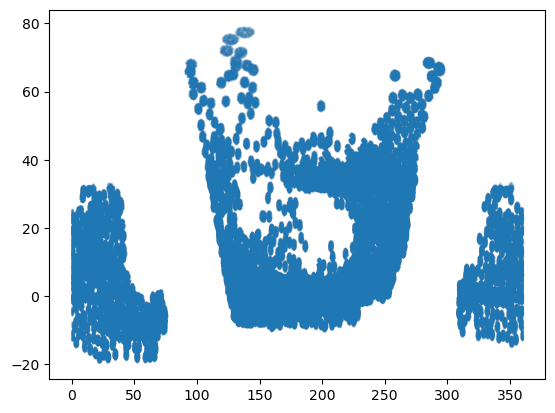

In [20]:
plt.scatter(test_zdata_secondary['TARGET_RA'], test_zdata_secondary['TARGET_DEC'], s=0.1,alpha=0.1)

In [22]:
scnd_target_masks = list(set(test_zdata_secondary['SCND_TARGET']))

In [23]:
len(scnd_target_masks)

227

In [43]:
scnd_counts = []
scnd_names = []
for scnd in scnd_target_masks:
    ii  = test_zdata_secondary['SCND_TARGET']==scnd
    scnd_counts.append(np.count_nonzero(ii))
    scnd_names.append(scnd_mask.names(scnd))
scnd_counts = np.array(scnd_counts)
ii_sorted = np.argsort(-scnd_counts)

In [45]:
for i in ii_sorted:
    print(scnd_counts[i], scnd_names[i])

841245 ['WISE_VAR_QSO']
242607 ['PSF_OUT_DARK']
143082 ['PSF_OUT_BRIGHT', 'PSF_OUT_DARK', 'WISE_VAR_QSO']
107108 ['PSF_OUT_DARK', 'WISE_VAR_QSO']
106002 ['PSF_OUT_BRIGHT', 'PSF_OUT_DARK']
61619 ['LOW_Z_TIER3']
56769 ['DC3R2_GAMA']
43467 ['LOW_Z_TIER2']
30872 ['PV_DARK_HIGH']
7067 ['LOW_Z_TIER1']
5857 ['QSO_RED', 'WISE_VAR_QSO']
5472 ['QSO_RED']
4546 ['PV_DARK_LOW']
2651 ['Z5_QSO']
2453 ['DC3R2_GAMA', 'WISE_VAR_QSO']
2170 ['MWS_CLUS_GAL_DEEP']
2052 ['FAINT_HPM']
2007 ['DC3R2_GAMA', 'PSF_OUT_DARK']
1943 ['STRONG_LENS']
1401 ['FIRST_MALS']
1393 ['DC3R2_GAMA', 'PSF_OUT_DARK', 'WISE_VAR_QSO']
1144 ['LOW_MASS_AGN']
1111 ['QSO_RED', 'PSF_OUT_BRIGHT', 'PSF_OUT_DARK', 'WISE_VAR_QSO']
872 ['DC3R2_GAMA', 'PSF_OUT_BRIGHT', 'PSF_OUT_DARK', 'WISE_VAR_QSO']
793 ['MWS_CLUS_GAL_DEEP', 'WISE_VAR_QSO']
773 ['QSO_RED', 'PSF_OUT_DARK', 'WISE_VAR_QSO']
762 ['MWS_RR_LYRAE']
751 ['DC3R2_GAMA', 'PSF_OUT_BRIGHT', 'PSF_OUT_DARK']
564 ['QSO_RED', 'PSF_OUT_BRIGHT', 'PSF_OUT_DARK']
564 ['QSO_RED', 'PSF_OUT_DARK']
4

['LOW_MASS_AGN']